# Index <a class="anchor" id="07.2.i"></a>

* [Exercise 1](#07.2.1)
* [Exercise 2](#07.2.2)
* [Exercise 3](#07.2.3)
* [Exercise 4](#07.2.4)
* [Exercise 5](#07.2.5)

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



## Exercise 1 <a class="anchor" id="07.2.1"></a>
* [Index](#07.2.i)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
max_speeds = np.load('data/07.2ex/max-speeds.npy')
years_nb = max_speeds.shape[0]

In [3]:
years = np.arange(years_nb) + 1
cprob = years / (years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)

In [4]:
spline = UnivariateSpline(cprob, sorted_max_speeds)

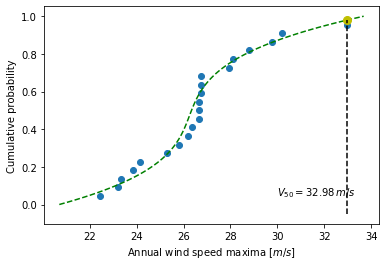

In [5]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

max_speeds = np.load('data/07.2ex/max-speeds.npy')
years_nb = max_speeds.shape[0]

cprob = (np.arange(years_nb, dtype=np.float32) + 1)/(years_nb + 1)
sorted_max_speeds = np.sort(max_speeds)
speed_spline = UnivariateSpline(cprob, sorted_max_speeds)
nprob = np.linspace(0, 1, 100)
fitted_max_speeds = speed_spline(nprob)

fifty_prob = 1. - 0.02
fifty_wind = speed_spline(fifty_prob)

plt.figure()
plt.plot(sorted_max_speeds, cprob, 'o')
plt.plot(fitted_max_speeds, nprob, 'g--')
plt.plot([fifty_wind], [fifty_prob], 'o', ms=8., mfc='y', mec='y')
plt.text(30, 0.05, '$V_{50} = %.2f \, m/s$' % fifty_wind)
plt.plot([fifty_wind, fifty_wind], [plt.axis()[2], fifty_prob], 'k--')
plt.xlabel('Annual wind speed maxima [$m/s$]')
plt.ylabel('Cumulative probability')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

## Exercise 2 <a class="anchor" id="07.2.2"></a>
* [Index](#07.2.i)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

In [7]:
T_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
T_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = np.array(range(1,13))

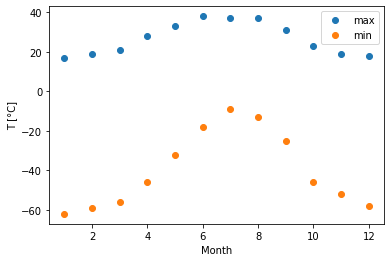

In [8]:
plt.plot(month, T_max, 'o', label='max')
plt.plot(month, T_min, 'o', label='min')
plt.xlabel('Month')
plt.ylabel('T [°C]')
plt.legend()
plt.show()

In [9]:
def func(x, constant, mu, sigma, baseline):
    return constant*stats.norm.pdf(x, mu, sigma) + baseline

In [10]:
par_T_max, cov_T_max = optimize.curve_fit(func, month, T_max, [20,6,2,20])
par_T_min, cov_T_min = optimize.curve_fit(func, month, T_min, [50,6,3,-60])

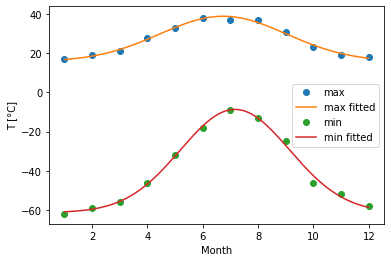

In [11]:
xs = np.arange(1.0,12.0,0.01)
plt.plot(month, T_max, 'o', label='max')
plt.plot(xs,func(xs, par_T_max[0], par_T_max[1], par_T_max[2], par_T_max[3]), label='max fitted')
plt.plot(month, T_min, 'o', label='min')
plt.plot(xs,func(xs, par_T_min[0], par_T_min[1], par_T_min[2], par_T_min[3]), label='min fitted')
plt.xlabel('Month')
plt.ylabel('T [°C]')
plt.legend()
plt.show()

The gaussian fit with a fixed baseline is reasonable.

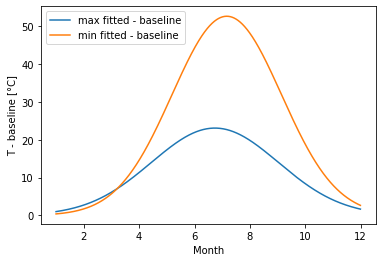

Centroid for max temperatures fit: 6.735816649936404
Centroid for min temperatures fit: 7.164525937154727
Centroids offset (mu_max - mu_min): -0.42870928721832335


In [12]:
plt.plot(xs,func(xs, par_T_max[0], par_T_max[1], par_T_max[2], 0), label='max fitted - baseline')
plt.plot(xs,func(xs, par_T_min[0], par_T_min[1], par_T_min[2], 0), label='min fitted - baseline')
plt.xlabel('Month')
plt.ylabel('T - baseline [°C]')
plt.legend()
plt.show()

print("Centroid for max temperatures fit:", par_T_max[1])
print("Centroid for min temperatures fit:", par_T_min[1])
print("Centroids offset (mu_max - mu_min):", par_T_max[1] - par_T_min[1])

Min a max temperatures have some offset, as it is possible to see from the difference of the two centroids. However it is not so relevant.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


## Exercise 3 <a class="anchor" id="07.2.3"></a>
* [Index](#07.2.i)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [14]:
def f(p):
    x = p[0]
    y = p[1]
    return (4.0 - 2.1*x*x + (x**4)/3.0)*x*x + x*y + (4.0*y*y - 4.0)*y*y

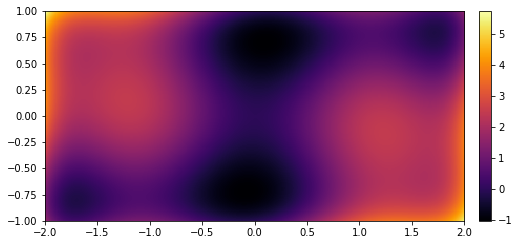

In [15]:
xs = np.arange(-2.0, 2.0, 0.01)
ys = np.arange(-1.0, 1.0, 0.01)
xv, yv = np.meshgrid(xs, ys)

fig, ax = plt.subplots(1,1,figsize=(8,6))
image = ax.imshow(f([xv,yv]), cmap='inferno', extent=[-2, 2, -1, 1])
divider = make_axes_locatable(ax)
cax1 = divider.append_axes("right", size="3%", pad=0.2)
fig.colorbar(image, cax = cax1)
plt.show()

In [16]:
st_points = [[0,0.75], [0,-0.75], [-2, 0.75], [2, -0.75]]

for point in st_points:
    minima = optimize.minimize(f, point)
    print("minimum found:", minima.x, "\tf=", minima.fun)

minimum found: [-0.08984202  0.71265641] 	f= -1.031628453489877
minimum found: [ 0.08984201 -0.71265642] 	f= -1.0316284534898743
minimum found: [-0.08984237  0.71265591] 	f= -1.0316284534871905
minimum found: [ 0.08984236 -0.71265592] 	f= -1.0316284534873517


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

## Exercise 4 <a class="anchor" id="07.2.4"></a>
* [Index](#07.2.i)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

In [18]:
import os.path

if not os.path.isfile('data/07.2ex/populations.txt'):
    !wget wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt -P data/07.2ex/

--2020-09-24 16:33:20--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-09-24 16:33:20--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2020-09-24 16:33:21--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8edcc29b87e4f2ce2f392cf20a.dl.dropboxusercontent.com/cd/0/inline/BABPSp8yiPc_7S16Rien6I3ShBN_gryLO3uZFEmy6DeOf_DLOvZSTitbP5_s9sbHrY9tliTAhh5ADrhbCg6jit3cftiKpN2nM7vO0Jvj3fO-GQ/file# [following]
--2020-09-24 16:33:21--  https://uc8edcc29b87e4f2ce2f392cf20a.dl.dropboxuserconte

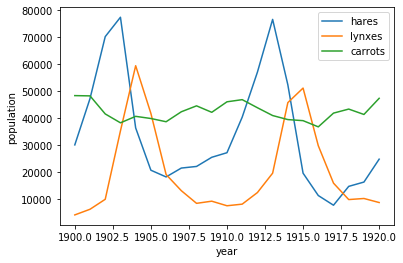

In [19]:
data = np.loadtxt('data/07.2ex/populations.txt')

year = data[:,0]
hare = data[:,1]
lynx = data[:,2]
carr = data[:,3]

plt.plot(year,hare,label='hares')
plt.plot(year,lynx,label='lynxes')
plt.plot(year,carr,label='carrots')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

[ 0.          0.04761905  0.0952381   0.14285714  0.19047619  0.23809524
  0.28571429  0.33333333  0.38095238  0.42857143  0.47619048 -0.47619048
 -0.42857143 -0.38095238 -0.33333333 -0.28571429 -0.23809524 -0.19047619
 -0.14285714 -0.0952381  -0.04761905]
[         inf  21.          10.5          7.           5.25
   4.2          3.5          3.           2.625        2.33333333
   2.1         -2.1         -2.33333333  -2.625       -3.
  -3.5         -4.2         -5.25        -7.         -10.5
 -21.        ]


/home/rocco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


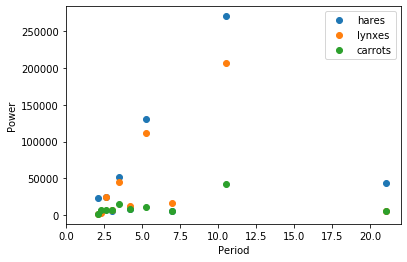

In [20]:
sig_hare = fftpack.fft(hare)
sig_lynx = fftpack.fft(lynx)
sig_carr = fftpack.fft(carr)

power_hare = abs(sig_hare)
power_lynx = abs(sig_lynx)
power_carr = abs(sig_carr)

frequencies = fftpack.fftfreq(data.shape[0], year[1] - year[0])
periods = 1 / frequencies
print(frequencies)
print(periods)

plt.plot(periods,power_hare, 'o', label='hares')
plt.plot(periods,power_lynx, 'o', label='lynxes')
plt.plot(periods,power_carr, 'o', label='carrots')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power')
plt.legend()
plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

## Exercise 5 <a class="anchor" id="07.2.5"></a>
* [Index](#07.2.i)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm

Text(0.5, 1.0, 'Original image')

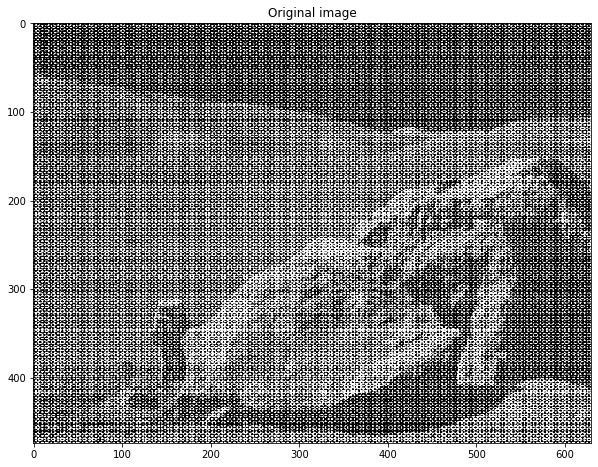

In [22]:
image = plt.imread('data/07.2ex/moonlanding.png')
plt.figure(figsize=(10,10))
plt.imshow(image, plt.cm.gray)
plt.title('Original image')

Text(0.5, 1.0, 'Fourier transformed image')

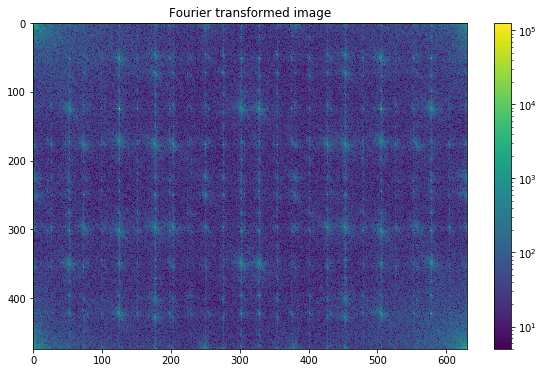

In [23]:
sig_image = fftpack.fft2(image)
plt.figure(figsize=(10,6))
plt.imshow(abs(sig_image), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transformed image')

Text(0.5, 1.0, 'Filtered Spectrum')

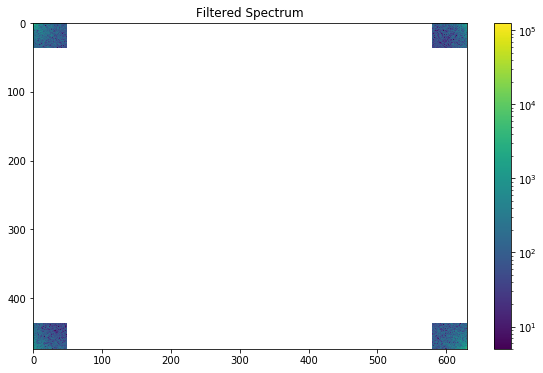

In [24]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.08

sig_image2 = sig_image.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = sig_image2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction)
# Similarly with the columns
sig_image2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
sig_image2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure(figsize=(10,6))
plt.imshow(abs(sig_image2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Filtered Image')

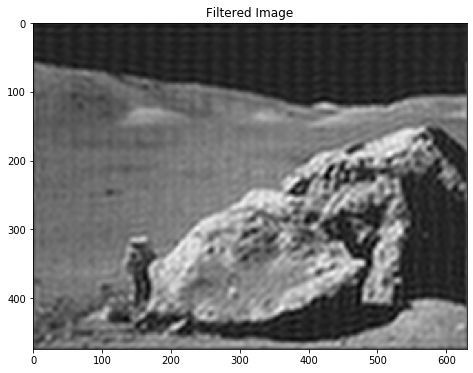

In [25]:
filtered_image = fftpack.ifft2(sig_image2).real

plt.figure(figsize=(10,6))
plt.imshow(filtered_image, plt.cm.gray)
plt.title('Filtered Image')